# Machine Learning and Statistics 2022 Assessment

Anomaly_detection_V02.ipynb Table of Contents

1. Introduction
    - 1.1 Machine Learning Project Notebook
    - 1.2 What Is TensorFlow?
    - 1.3 What Is Keras?
    - 1.4 Why use Keras?
    - 1.5 Single Neuron
    - 1.6 What is a Reconstruction Convolutional Autoencoder Model?

2. Detect anomalies in a timeseries using an Autoencoder
    - 2.1 Introduction
    - 2.2 Setup
    - 2.3 Load the data
    - 2.4 
    - 2.5 
    - 2.6
    - 2.7 
    - 2.8 
3. 
    - 3.1 
    - 3.2 
    - 3.3 
    - 3.4 
4. References 

# 1. Introduction

## 1.1 Machine Learning Project Notebook

- On the keras website, there is an example of time-series anomaly detection. Re-create this example in a notebook of your own, explaining the concepts
    - Keras Team. Keras: the python  deep learning api, 2022a. URL https://keras.io/
    - Keras Team. Timeseries anomaly detection using an autoencoder, 2022b. URL https://keras.io/examples/timeseries/timeseries_anomaly_detection/
- Clearly explain each keras function used, referring to the documentation 
- Include an introduction to your notebook, setting the context and describing what the reader can expect as they read down through the notebook.
- Include a conclusion section where you suggest improvements you could make to the analysis in the notebook.
- Pitch all your work at your classmates as the audience. [4]

## 1.2 What Is TensorFlow?

TensorFlow is an open-source end-to-end machine learning framework that is designed to make it easy to build and deploy machine learning models. It is widely used in the field of artificial intelligence and machine learning, and is known for its ability to perform a variety of tasks including deep neural network training and inference.

One of the key features of TensorFlow is its ability to perform symbolic math using dataflow and differentiable programming. This allows users to build machine learning models by constructing computational graphs that represent the relationships between different variables and operations. TensorFlow also provides a range of tools, frameworks, and community resources that can be used to build and deploy machine learning applications.

Overall, TensorFlow is a powerful and widely-used tool for building and deploying machine learning models, and is suitable for a wide range of applications and use cases. [2] 


## 1.3 What Is Keras?

Keras is a high-level deep learning API that is designed to make it easy to build, train, and deploy neural networks. It is written in Python and provides a simple, user-friendly interface for building neural networks, allowing even those with little to no experience in deep learning to get started quickly.

One of the key features of Keras is its flexibility in terms of the backends it can use for computations. It can use multiple backends such as TensorFlow, Theano, or CNTK, allowing users to choose the backend that best fits their needs.

While Keras may not be as fast as some other deep learning frameworks, it is still a powerful tool for building and training neural networks, and is widely used in the field of machine learning and artificial intelligence. 

TensorFlow has adopted Keras as its official high-level API, and Keras is fully integrated with TensorFlow. This allows users to take advantage of the simplicity and user-friendliness of Keras for building and training neural networks, while also having the option to use the TensorFlow Core API for more advanced customizations and fine-tuning.

Using the TensorFlow Core API in conjunction with Keras can provide a powerful combination for building and training neural networks, as it allows users to leverage the high-level abstractions of Keras while also having the flexibility and control of the lower-level TensorFlow Core API.

Overall, both Keras and TensorFlow are widely used in the field of machine learning and artificial intelligence, and are powerful tools for building and training neural networks. [3] [9]

## 1.4 Why use Keras?

1. Keras is an API that was made to be easy to learn for people
2. Prototyping time in Keras is less
3. Keras runs on top of TensorFlow and is relatively fast
4. Documentation and help available are far more extensive than other deep learning frameworks
5. Keras is used commercially by many companies
6. It runs smoothly on both CPU and GPU
7. Supports almost all neural network models.
8. It is modular in nature, which makes it expressive, flexible, and apt for innovative research. [3] [9]


## 1.5 Single Neuron

A single neuron with 3 input connections and 1 output. There is a forward propagate method calculates the output of the neuron, and the back propagate method calculates the error in the output of the neuron and updates the weights.

To train the neural network, you can loop through a set of training examples and forward propagate and back propagate for each example. You can then evaluate the accuracy of the neural network by comparing the output of the neuron to the expected output for each training example. [5]

![Single_Neuron](https://raw.githubusercontent.com/DPR-droid/2022_09_Machine_Learning_and_Statistics/main/data/Single_Neuron.svg?raw=true)


## 1.6 What is a Reconstruction Convolutional Autoencoder Model?
A convolutional autoencoder is a type of neural network that is used for unsupervised learning. It is composed of two main parts; an encoder and a decoder. [6] A convolutional autoencoder is a variant of a Convolutional Neural Networks (CNNs) [7] are well-suited for forecasting time-series data because they can take advantage of the temporal relationships between observations in the time-series. [8]

# 2. Detect anomalies in a timeseries using an Autoencoder. [1]

## 2.1 Introduction [1]
This script demonstrates how you can use a reconstruction convolutional autoencoder model to detect anomalies in timeseries data. [1]

## 2.2 Setup [1]


In [1]:
# Excerpt from keras time-series anomaly detection [1]
# Imports

# Numerical arrays
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks refer to 1.3 What Is Keras? and 1.2 What Is TensorFlow? 
import tensorflow.keras as keras

from matplotlib import pyplot as plt


## 2.3 Load the data  [1]

We will use the [Numenta Anomaly Benchmark(NAB)](https://www.kaggle.com/boltzmannbrain/nab) and it's [github](https://github.com/numenta/NAB) dataset. Numenta Anomaly Benchmark (NAB) is an open-source framework for evaluating the performance of anomaly detection algorithms.[10]  NAB includes a large dataset of real-world time-series data from a variety of sources, such as traffic data, temperature data, and machine performance data. The dataset includes both normal and anomalous data, and the goal of NAB is to provide a standardized way to evaluate the ability of anomaly detection algorithms to identify anomalies in the data. [11]


The [art_daily_small_noise.csv](https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/) and [art_daily_jumpsup.csv](https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/) datasets are time-series datasets that contain data from artificially generated time-series that are ordered, timestamped, single-valued metrics.

The [art_daily_small_noise.csv](https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/) dataset without anomaly. 

The [art_daily_jumpsup.csv](https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/) dataset with anomaly. 

These datasets are intended to be used to evaluate the ability of anomaly detection algorithms to identify anomalies in the data.

Data are ordered, timestamped, single-valued metrics. We will use the `art_daily_small_noise.csv` file for training and the `art_daily_jumpsup.csv` file for testing. The simplicity of this dataset allows us to demonstrate anomaly detection effectively.




In [ ]:
# https://peps.python.org/pep-0008/#maximum-line-length
# For flowing long blocks of text with fewer structural restrictions 
# (docstrings or comments), the line length should be limited to 72 characters (78 Charactr long + this part is 116)

# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [2]:
# Add NEW DR
# Where did the data come from?
# Df head
# https://github.com/numenta/NAB/tree/master/data
# https://www.kaggle.com/code/mineshjethva/timeseries-anomaly-detection-using-rnn-autoencoder/notebook

master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)


In [3]:
df_small_noise

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120
...,...
2014-04-14 23:35:00,20.211195
2014-04-14 23:40:00,20.531041
2014-04-14 23:45:00,19.032127


In [4]:
df_daily_jumpsup

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739
...,...
2014-04-14 23:35:00,18.074649
2014-04-14 23:40:00,21.002014
2014-04-14 23:45:00,20.566713


In [5]:
df_small_noise.compare(df_daily_jumpsup)

value           
                          self      other
timestamp                                
2014-04-01 00:00:00  18.324919  19.761252
2014-04-01 00:05:00  21.970327  20.500833
2014-04-01 00:10:00  18.624806  19.961641
2014-04-01 00:15:00  21.953684  21.490266
2014-04-01 00:20:00  21.909120  20.187739
...                        ...        ...
2014-04-14 23:35:00  20.211195  18.074649
2014-04-14 23:40:00  20.531041  21.002014
2014-04-14 23:45:00  19.032127  20.566713
2014-04-14 23:50:00  21.798801  18.254193
2014-04-14 23:55:00  18.682620  21.863147

[4032 rows x 2 columns]

In [6]:
df_small_noise.index

DatetimeIndex(['2014-04-01 00:00:00', '2014-04-01 00:05:00',
               '2014-04-01 00:10:00', '2014-04-01 00:15:00',
               '2014-04-01 00:20:00', '2014-04-01 00:25:00',
               '2014-04-01 00:30:00', '2014-04-01 00:35:00',
               '2014-04-01 00:40:00', '2014-04-01 00:45:00',
               ...
               '2014-04-14 23:10:00', '2014-04-14 23:15:00',
               '2014-04-14 23:20:00', '2014-04-14 23:25:00',
               '2014-04-14 23:30:00', '2014-04-14 23:35:00',
               '2014-04-14 23:40:00', '2014-04-14 23:45:00',
               '2014-04-14 23:50:00', '2014-04-14 23:55:00'],
              dtype='datetime64[ns]', name='timestamp', length=4032, freq=None)

In [7]:
# https://www.educative.io/answers/how-to-compare-two-dataframes-in-pandas
df_small_noise.compare(df_daily_jumpsup, keep_equal=True)

value           
                          self      other
timestamp                                
2014-04-01 00:00:00  18.324919  19.761252
2014-04-01 00:05:00  21.970327  20.500833
2014-04-01 00:10:00  18.624806  19.961641
2014-04-01 00:15:00  21.953684  21.490266
2014-04-01 00:20:00  21.909120  20.187739
...                        ...        ...
2014-04-14 23:35:00  20.211195  18.074649
2014-04-14 23:40:00  20.531041  21.002014
2014-04-14 23:45:00  19.032127  20.566713
2014-04-14 23:50:00  21.798801  18.254193
2014-04-14 23:55:00  18.682620  21.863147

[4032 rows x 2 columns]

In [8]:
# https://www.skytowner.com/explore/checking_differences_between_two_indexes_in_pandas
a = df_small_noise.index
b = df_daily_jumpsup.index
a.difference(b)

DatetimeIndex([], dtype='datetime64[ns]', name='timestamp', freq=None)

In [9]:
# https://www.statology.org/pandas-merge-on-index/
df3  = pd.merge(df_small_noise, df_daily_jumpsup, left_index=True, right_index=True)
df3

,value_x,value_y
timestamp,,
2014-04-01 00:00:00,18.324919,19.761252
2014-04-01 00:05:00,21.970327,20.500833
2014-04-01 00:10:00,18.624806,19.961641
2014-04-01 00:15:00,21.953684,21.490266
2014-04-01 00:20:00,21.909120,20.187739
...,...,...
2014-04-14 23:35:00,20.211195,18.074649
2014-04-14 23:40:00,20.531041,21.002014
2014-04-14 23:45:00,19.032127,20.566713


In [10]:
# https://www.geeksforgeeks.org/how-to-compare-two-columns-in-pandas/
df3['new'] = np.where((df3['value_x'] <= df3['value_y']), df3['value_x'], np.nan)
df3

,value_x,value_y,new
timestamp,,,
2014-04-01 00:00:00,18.324919,19.761252,18.324919
2014-04-01 00:05:00,21.970327,20.500833,NaN
2014-04-01 00:10:00,18.624806,19.961641,18.624806
2014-04-01 00:15:00,21.953684,21.490266,NaN
2014-04-01 00:20:00,21.909120,20.187739,NaN
...,...,...,...
2014-04-14 23:35:00,20.211195,18.074649,NaN
2014-04-14 23:40:00,20.531041,21.002014,20.531041
2014-04-14 23:45:00,19.032127,20.566713,19.032127


## Quick look at the data

In [11]:
print(df_small_noise.head())

print(df_daily_jumpsup.head())


                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120
                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


## Visualize the data
### Timeseries data without anomalies
We will use the following data for training.

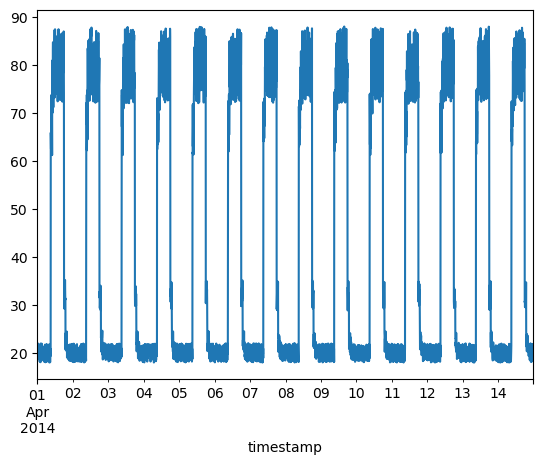

In [12]:
fig, ax = plt.subplots()
df_small_noise.plot(legend=False, ax=ax)
plt.show()


### Timeseries data with anomalies
We will use the following data for testing and see if the sudden jump up in the
data is detected as an anomaly.

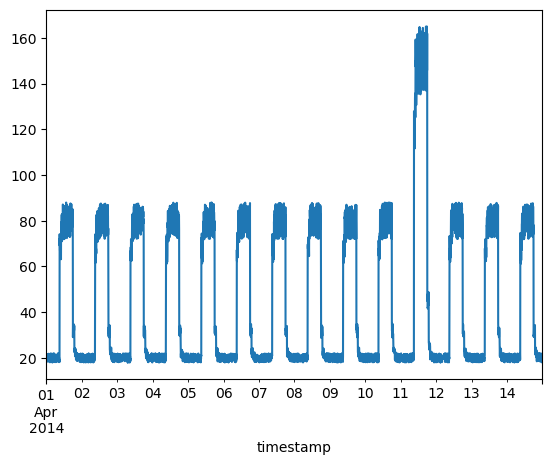

In [13]:
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()


## Prepare training data
Get data values from the training timeseries data file and normalize the
`value` data. We have a `value` for every 5 mins for 14 days.
-   24 * 60 / 5 = **288 timesteps per day**
-   288 * 14 = **4032 data points** in total

In [14]:
# Add NEW DR
# sanity check
df_train_vals = (df_small_noise - df_small_noise.mean()) / df_small_noise.std()


In [15]:
# Add NEW DR
# https://www.w3resource.com/pandas/dataframe/dataframe-head.php 
# The head() function is used to get the first n rows.
# This function returns the first n rows for the object based on position. 
# It is useful for quickly testing if your object has the right type of data in it.

df_train_vals.head()


,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [16]:
df_train_vals.shape

(4032, 1)

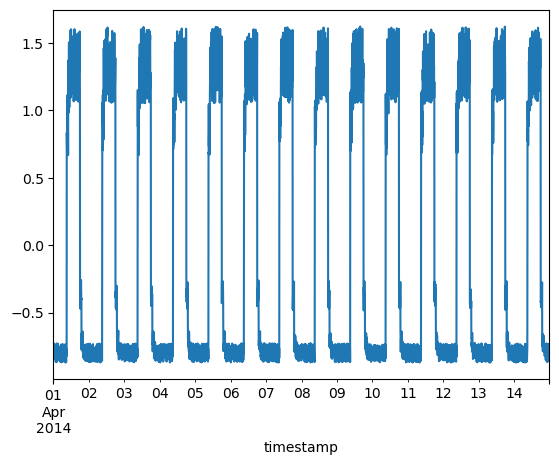

In [17]:
# Add NEW DR
# Replot output of sanity check
fig, ax = plt.subplots()
df_train_vals.plot(legend=False, ax=ax)
plt.show()

In [18]:
# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))


Number of training samples: 4032


### Create sequences
Create sequences combining `TIME_STEPS` contiguous data values from the
training data.

In [19]:
# Add NEW DR
TIME_STEPS = 288

In [20]:
# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


In [21]:

x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (3745, 288, 1)


In [22]:
x_train.shape

(3745, 288, 1)

## Build a model
We will build a convolutional reconstruction autoencoder model. The model will
take input of shape `(batch_size, sequence_length, num_features)` and return
output of the same shape. In this case, `sequence_length` is 288 and
`num_features` is 1.

In [23]:
# https://www.tensorflow.org/tutorials/images/cnn
# 

model = keras.Sequential(
    [
        # Add NEW DR
        # Add comments in for each layer https://keras.io/api/layers/core_layers/input/
        keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        # https://keras.io/api/layers/convolution_layers/convolution1d/
        # https://shivapriya-katta.medium.com/time-series-forecasting-using-conv1d-lstm-multiple-timesteps-into-future-acc684dcaaa
        keras.layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        # https://keras.io/api/layers/regularization_layers/dropout/
        # https://www.oreilly.com/library/view/machine-learning-for/9781786469878/252b7560-e262-49c4-9c8f-5b78d2eec420.xhtml
        keras.layers.Dropout(rate=0.2),
        # https://keras.io/api/layers/convolution_layers/convolution1d/
        keras.layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        # https://keras.io/api/layers/convolution_layers/convolution1d_transpose/ 
        # https://www.geeksforgeeks.org/python-tensorflow-tf-keras-layers-conv1dtranspose-function/
        keras.layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        # https://keras.io/api/layers/regularization_layers/dropout/
        keras.layers.Dropout(rate=0.2),
        # https://keras.io/api/layers/convolution_layers/convolution1d_transpose/
        keras.layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        # https://keras.io/api/layers/convolution_layers/convolution1d_transpose/
        keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

## Train the model
Please note that we are using `x_train` as both the input and the target
since this is a reconstruction model.

In [24]:
# Add NEW DR

history = model.fit(
    x_train,
    x_train,
    epochs=200,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)


Epoch 1/200
27/27 [==============================] - 4s 99ms/step - loss: 0.5629 - val_loss: 0.3574
Epoch 2/200
27/27 [==============================] - 2s 69ms/step - loss: 0.2389 - val_loss: 0.0684
Epoch 3/200
27/27 [==============================] - 2s 73ms/step - loss: 0.0582 - val_loss: 0.0346
Epoch 4/200
27/27 [==============================] - 2s 68ms/step - loss: 0.0434 - val_loss: 0.0271
Epoch 5/200
27/27 [==============================] - 2s 72ms/step - loss: 0.0376 - val_loss: 0.0256
Epoch 6/200
27/27 [==============================] - 2s 76ms/step - loss: 0.0338 - val_loss: 0.0223
Epoch 7/200
27/27 [==============================] - 2s 73ms/step - loss: 0.0312 - val_loss: 0.0223
Epoch 8/200
27/27 [==============================] - 2s 88ms/step - loss: 0.0291 - val_loss: 0.0217
Epoch 9/200
27/27 [==============================] - 2s 75ms/step - loss: 0.0275 - val_loss: 0.0238
Epoch 10/200
27/27 [==============================] - 3s 116ms/step - loss: 0.0262 - val_loss: 0.021

Let's plot training and validation loss to see how the training went.

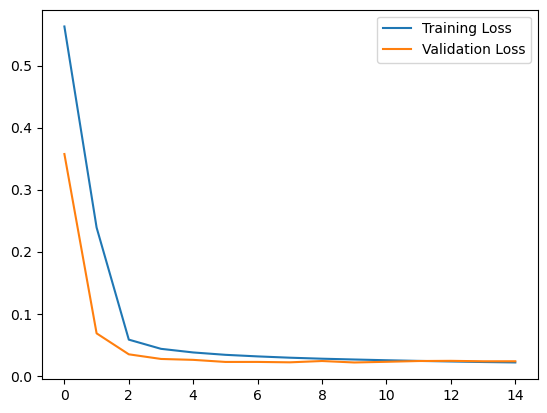

In [25]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()


## Detecting anomalies
We will detect anomalies by determining how well our model can reconstruct
the input data.
1.   Find MAE loss on training samples.
2.   Find max MAE loss value. This is the worst our model has performed trying
to reconstruct a sample. We will make this the `threshold` for anomaly
detection.
3.   If the reconstruction loss for a sample is greater than this `threshold`
value then we can infer that the model is seeing a pattern that it isn't
familiar with. We will label this sample as an `anomaly`.

118/118 [==============================] - 1s 4ms/step


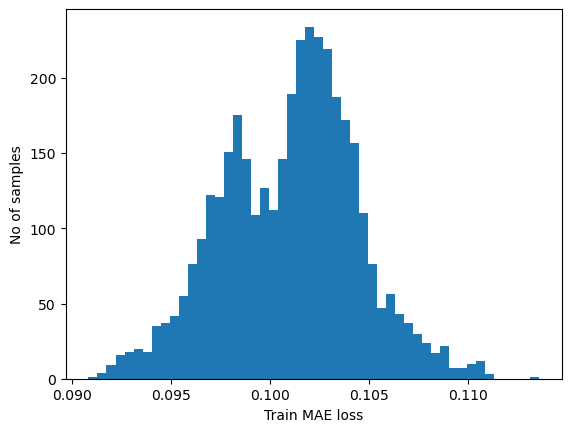

Reconstruction error threshold:  0.11357457086664799


In [26]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
# find the prediction and get value
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)


# then create a plot
plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)


### Compare recontruction
Just for fun, let's see how our model has recontructed the first sample.
This is the 288 timesteps from day 1 of our training dataset.

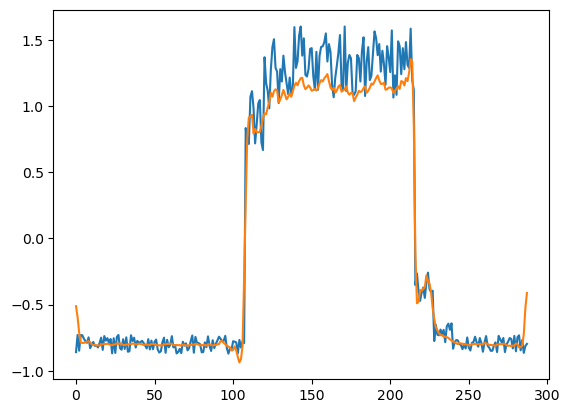

In [27]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()


### Prepare test data



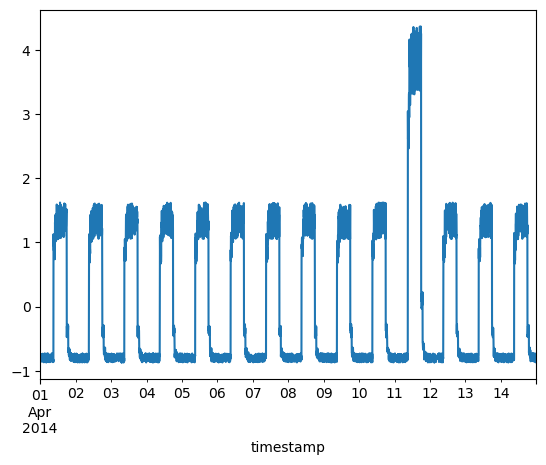

Test input shape:  (3745, 288, 1)
118/118 [==============================] - 0s 4ms/step


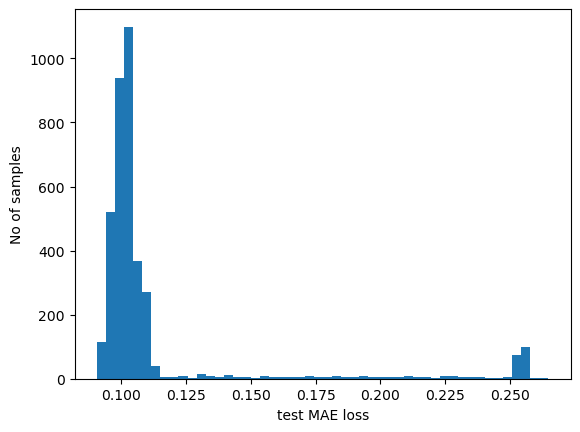

Number of anomaly samples:  394
Indices of anomaly samples:  (array([2522, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710,
       2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721,
       2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732,
       2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743,
       2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754,
       2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765,
       2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776,
       2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787,
       2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798,
       2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809,
       2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820,
       2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831,
       2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2

In [28]:
df_test_value = (df_daily_jumpsup - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))


## Plot anomalies
We now know the samples of the data which are anomalies. With this, we will
find the corresponding `timestamps` from the original test data. We will be
using the following method to do that:
Let's say time_steps = 3 and we have 10 training values. Our `x_train` will
look like this:
- 0, 1, 2
- 1, 2, 3
- 2, 3, 4
- 3, 4, 5
- 4, 5, 6
- 5, 6, 7
- 6, 7, 8
- 7, 8, 9
All except the initial and the final time_steps-1 data values, will appear in
`time_steps` number of samples. So, if we know that the samples
[(3, 4, 5), (4, 5, 6), (5, 6, 7)] are anomalies, we can say that the data point
5 is an anomaly.

In [29]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)


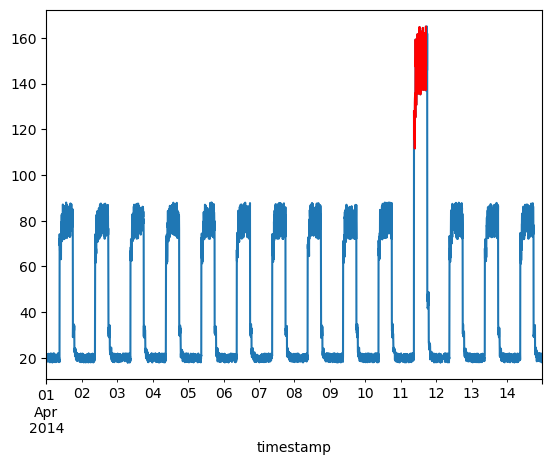

In [30]:
df_subset = df_daily_jumpsup.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()


<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h3>References</h3>
 
[1] https://keras.io/examples/timeseries/timeseries_anomaly_detection/

[2] https://towardsai.net/p/l/what-is-tensorflow-and-how-does-it-work

[3] https://www.simplilearn.com/tutorials/deep-learning-tutorial/what-is-keras

[4] https://github.com/ianmcloughlin/2223-S1-machine-learn-stats

[5] https://www.geeksforgeeks.org/single-neuron-neural-network-python/

[6] https://machinelearningmastery.com/autoencoder-for-classification/

[7] https://analyticsindiamag.com/how-to-implement-convolutional-autoencoder-in-pytorch-with-cuda/

[8] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9040363/

[9] https://github.com/keras-team/keras/blob/master/README.md

[10] https://www.numenta.com/resources/htm/numenta-anomoly-benchmark/

[11] https://github.com/numenta/NAB

[12]

[13] 

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h3>END</h3>

https://keras.io/examples/timeseries/timeseries_anomaly_detection/

https://www.kaggle.com/code/adithya44/anomaly-detection-with-time-series-forecasting

https://www.google.com/search?client=firefox-b-d&q=time+series+anomaly+detection+kaggle

https://www.google.com/search?client=firefox-b-d&q=Time+Series+anomaly+detection+using+Keras+explain&spell=1&sa=X&ved=2ahUKEwj3xLa67qT7AhX-RkEAHTSJDOoQBSgAegQIJBAB&biw=2560&bih=1287&dpr=1.5

https://neptune.ai/blog/anomaly-detection-in-time-series

https://www.google.com/search?client=firefox-b-d&q=examples+of+Time+Series+anomaly+detection+keras&spell=1&sa=X&ved=2ahUKEwjCgv3U7qT7AhWHWMAKHVNXA6MQBSgAegQIOhAB&biw=2560&bih=1287&dpr=1.5

https://valueml.com/anomaly-detection-in-time-series-data-using-keras/

https://towardsdatascience.com/time-series-of-price-anomaly-detection-with-lstm-11a12ba4f6d9

https://huggingface.co/keras-io/timeseries-anomaly-detection?data=%7B%7D

https://www.youtube.com/watch?v=H4J74KstHTE

https://curiousily.com/posts/anomaly-detection-in-time-series-with-lstms-using-keras-in-python/
